<a href="https://colab.research.google.com/github/ruben9324/curso-series-temporales/blob/master/Copia_de_Tutoria_master_modulo_textMining_gensim_con_huecos_HACERCOPIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Puntos a tener en cuenta cuando nos enfrentamos a un problema de Text Mining:
 

*   Idioma
*   Origen de los datos
    - ¿Textos cortos? ¿Redes sociales?
    - ¿Disponemos de datos etiquetados?
*   Preprocesado/normalización de los datos
    - Mejor consejo: **Consultar bibliografía** [Link ejemplo](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0232525)
    - El preprocesado es diferente según el origen de los datos.


Vamos a hacer un ejercicio de ejemplo para ver estos datos.








### Descarga de datos:

Vamos a descargar los datos proporcionados por la compañia [sentiment140](http://help.sentiment140.com/for-students). 

In [ ]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
!unzip trainingandtestdata.zip

URL transformed to HTTPS due to an HSTS policy
--2022-05-26 19:06:49--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip.1’

trainingandtestdata 100%[===================>]  77.59M  19.8MB/s    in 5.0s    

2022-05-26 19:06:55 (15.6 MB/s) - ‘trainingandtestdata.zip.1’ saved [81363704/81363704]

Archive:  trainingandtestdata.zip
replace testdata.manual.2009.06.14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Los datos con los que vamos a trabajar están contenidos en el archivo csv llamado "testdata.manual.2009.06.14.csv". El archivo tiene 6 campos:



*   Polaridad del tweet:
    - 0 --> Negativo
    - 2 --> Neutral 
    - 4 --> Positivo
*   Identificador
*   Fecha del tweet
*   Campo no utilizado
*   Usuario autor del tweet
*   Texto del tweet



### Importación de datos


In [ ]:
import numpy as np
import pandas as pd

datos = pd.read_csv("training.1600000.processed.noemoticon.csv",sep=",",
                    names=["label","id","fecha","not_used","autor","texto"],
                    header=None, encoding='latin-1')


In [ ]:
datos

,label,id,fecha,not_used,autor,texto
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Nos vamos a quedar sólo con los tweets con etiqueta positivo (4) y negativo (0):

In [ ]:
datos = datos[datos.label.isin([0,4])]  #[0,4]

Vamos a trabajar con una muestra más reducida (un total de 20000 tweets). "Desbalanceando" el conjunto de datos para tener que gestionar el desbalanceo de clases.

In [ ]:
neg_tweets = datos[datos.label==0].sample(13000)  #0
pos_tweets = datos[datos.label==4].sample(7000)  #4
datos = pd.concat([neg_tweets,pos_tweets ], ignore_index=True)

In [ ]:
datos

,label,id,fecha,not_used,autor,texto
0,0,2003084512,Tue Jun 02 05:50:44 PDT 2009,NO_QUERY,llanelwy,Time to head to work. Doing the late shift tod...
1,0,1984738467,Sun May 31 15:42:34 PDT 2009,NO_QUERY,srcohen,Thunderstorm in Boston
2,0,2068037535,Sun Jun 07 13:23:27 PDT 2009,NO_QUERY,mdltbird,What a beautiful day. Going to see my friend t...
3,0,1833613005,Sun May 17 23:51:40 PDT 2009,NO_QUERY,kiraling,@pursebuzz Finally someone admits it! Storylin...
4,0,1974397212,Sat May 30 13:03:15 PDT 2009,NO_QUERY,Clintendo64,Were passing lake travis right now. I want to ...
...,...,...,...,...,...,...
19995,4,1960315077,Fri May 29 07:46:10 PDT 2009,NO_QUERY,Sharky909,"@ThisIsRobThomas hey, what are you working on ..."
19996,4,2186697869,Mon Jun 15 19:12:29 PDT 2009,NO_QUERY,EtrntyNTwlght,"@KalebNation I love the quote thing, but musi..."
19997,4,1883133555,Fri May 22 08:03:42 PDT 2009,NO_QUERY,CrystalHebel,@msrachelriley I need my fat girl beauty rest
19998,4,1556569855,Sat Apr 18 23:22:25 PDT 2009,NO_QUERY,buzzvn,"some nice presentations up on slideshare, when..."


### Análisis exploratorio de los datos (EDA)


Como es habitual, vamos a hacer un pequeño análisis exploratorio de los datos.



*   **Nº de documentos y columnas**



In [ ]:
print("Tenemos un conjunto de {} documentos".format(len(datos)))
print("El dataframe tiene {} columnas".format(datos.shape[1]))

Tenemos un conjunto de 20000 documentos
El dataframe tiene 6 columnas



*   **Análisis simple de duplicados**



In [ ]:
print("Existen {} tweets que están duplicados. Procedemos a eliminarlos...".format(np.sum(datos.duplicated(subset=["texto"]))))
# Quitaremos esos duplicados
datos = datos.drop_duplicates(subset="texto")
print("Despues de quitar duplicados tenemos un conjunto de {} noticias".format(datos.shape[0]))

Existen 26 tweets que están duplicados. Procedemos a eliminarlos...
Despues de quitar duplicados tenemos un conjunto de 19974 noticias


*   **Análisis de etiquetas**

Anteriormente hemos seleccionado unicamente las etiquetas 0 y 4 para simplificar el clasificador que generemos. Vamos a ver la distribución de estas:





In [ ]:
datos["label"].value_counts() #value_counts()

0    12977
4     6997
Name: label, dtype: int64

Como hemos visto antes, es un desdataset balanceado. Nuestra clase de interes (clase positiva,4) es claramente minoritaria. Tendremos que gestionar el desbalanceo de clases en pasos posteriores.


_importante para el ejercicio propuesto!!!_

*   **Contenido de los tweets**

Antes de empezar a procesar, vamos a revisar algunos tweets de cada una de las dos clases

Tweets positivos:

In [ ]:
datos[datos.label==4].sample(3).texto.to_list()

['@ruSh_Me Lollzz Really... I dont track my readers so would never know ',
 'Is Watching A Movie With Dill. ',
 "@blueholly I luv you too and no you hadn't! I was waiting fooooorrrreeeevvveeerrrr! "]

Tweets negativos:

In [ ]:
datos[datos.label==0].sample(3).texto.to_list()

["@nsane8 I hate that u won't be able to tweet at work anymore ",
 '@templon I personally know so many people/agencies which could have built these sites. It is like a Pres candidate buying a Honda. ',
 "Just realised I can't find my sonic screwdriver! I &lt;3 my screwdriver "]

* **Distribución de la longitud de los tweets en caracteres:**

Para seguir con el análisis exploratorio, vamos a hacer un cálculo típico: la longitud de cada uno de los textos de los documentos para despues dibujar su histograma. 

Comenzamos creando las columnas que van a almacenar las longitud en caracteres y en tokens de los documentos del corpus:

In [ ]:
datos["char_len"] = datos["texto"].apply(lambda x: len(x))  #len(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Vemos que todos los tweets  menos de 150 caracteres. Si quisiéramos utilizar con un modelo nuevo, deberíamos entrenar con datos más recientes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


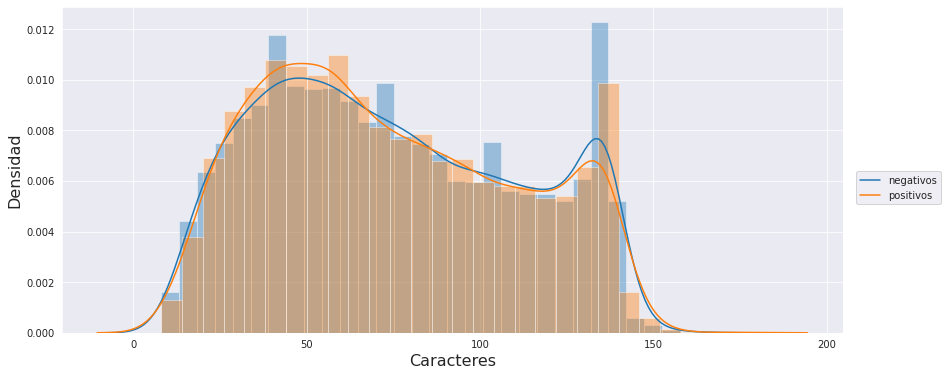

In [ ]:
# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(datos[datos["label"]==0].char_len, hist=True, label="negativos")
plt2 = sns.distplot(datos[datos["label"]==4].char_len, hist=True, label="positivos")
fig.legend(labels=['negativos','positivos'], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()


### Transformación


Vamos a proceder a normalizar los datos. Para ello vamos a utilizar las funciones anteriormente definidas:

- Preprocesar los textos:
    - Primero expanderemos las contracciones de los tweets
    - En esta ocasión no extraeremos los emojis.
    - Tokenizaremos
    - Quitaremos stop words
    - Quitaremos puntuación
    - Lematizaremos

#### Expandir contracciones.
Este paso sólo se hace con contenido en inglés!! 

In [ ]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 21.6 MB/s 
     |████████████████████████████████| 287 kB 78.0 MB/s 


In [ ]:
# Reemplazar contracciones y slang en inglés usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    expanded_words = []
    # Divide el texto
    for t in text.split():
        # Aplica la función fix en cada sección o token del texto buscando contracciones y slang
        expanded_words.append(contractions.fix(t,slang=True))#fix(t, slang = True)
    expanded_text = ' '.join(expanded_words) 
    return expanded_text

Comprobamos su funcionamiento

In [ ]:
replace_contraction("I'm very happy, I luv it")

'I am very happy, I love it'

Ejecutamos la función

In [ ]:
datos["tweet_texto_processed"] = datos["texto"].apply(lambda x: replace_contraction(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos["tweet_texto_processed"].iloc[0]

'Time to head to work. Doing the late shift today to cover. Working till 6pm'

#### Transformamos a minúsculas
Así reducimos dimensionalidad

In [ ]:
datos["tweet_texto_processed"] = datos["tweet_texto_processed"].apply(lambda x: x.lower()) #lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos["tweet_texto_processed"].iloc[0]

'time to head to work. doing the late shift today to cover. working till 6pm'

#### Tokenizamos
Utilizando un tokenizador específico para TWITTER!!

In [ ]:
from nltk.tokenize import TweetTokenizer
# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()#TweetTokenizer
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

In [ ]:
tokenize("@mencion #very happy, I luv it")

['@mencion', '#very', 'happy', ',', 'I', 'luv', 'it']

In [ ]:
datos["tweet_texto_processed"] = datos["tweet_texto_processed"].apply(lambda x: tokenize(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos["tweet_texto_processed"].iloc[0]

['time',
 'to',
 'head',
 'to',
 'work',
 '.',
 'doing',
 'the',
 'late',
 'shift',
 'today',
 'to',
 'cover',
 '.',
 'working',
 'till',
 '6pm']

#### Quitamos stopwords
Las stopwords cambian entre idiomas!

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Quitar stop words de una lista de tokens
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
datos["tweet_texto_processed"] = datos["tweet_texto_processed"].apply(lambda x: quitar_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos["tweet_texto_processed"].iloc[0]

['time',
 'head',
 'work',
 '.',
 'late',
 'shift',
 'today',
 'cover',
 '.',
 'working',
 'till',
 '6pm']

#### Puntuación
Podríamos quitarla, pero en ese caso vamos a mantenerla, para ver si hay algún conjunto de caracteres como ":)" que formen alguna característica.

#### Lematizamos
De nuevo, DEPENDIENTE del idioma

In [ ]:
!pip install spacy==3.2.1
!python -m spacy download en_core_web_sm

In [ ]:

import en_core_web_sm
from tqdm import tqdm
tqdm.pandas()

# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens) #tokens
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

In [ ]:
sp_obj = nlp("fifth time")
mytokens = [ word.lemma_ for word in sp_obj ]
mytokens

['fifth', 'time']

In [ ]:
datos["tweet_texto_processed"] = datos["tweet_texto_processed"].progress_apply(lambda x: lematizar(x)) #lematizar

100%|██████████| 19974/19974 [02:01<00:00, 164.68it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos["tweet_texto_processed"].iloc[0]

'time head work . late shift today cover . work till 6 pm'

#### Extraemos sentimiento de los tweets
De nuevo, DEPENDIENTE del idioma. Utilizaremos [textblob](https://textblob.readthedocs.io/en/dev/quickstart.html?highlight=polarity#sentiment-analysis). Para español hay que buscar alternativas.

In [ ]:
from textblob import TextBlob
datos["sent_subjectivity_str"] = datos["tweet_texto_processed"].progress_apply(lambda x: TextBlob(x).sentiment.subjectivity) #TextBlob(x).sentiment.subjectivity
datos["sent_polarity_str"] = datos["tweet_texto_processed"].progress_apply(lambda x: TextBlob(x).sentiment.polarity) # TextBlob(x).sentiment.polarity

100%|██████████| 19974/19974 [00:03<00:00, 5373.88it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 19974/19974 [00:03<00:00, 5487.98it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


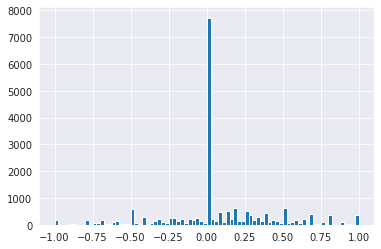

In [ ]:
datos["sent_polarity_str"].hist(bins=80)

#### Vectorización y unión  características

Una vez hemos limpiado y procesado el texto, vamos a extraer características utilizando embeddings:

In [ ]:
import gensim.downloader as api
glove_emb = api.load('glove-twitter-25') # Descargamos y cargamosel embedding de "glove-twitter-25"

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
glove_emb.get_vector("noise")

array([-0.050552 ,  0.27055  ,  0.30356  ,  1.0229   ,  0.57149  ,
        0.27212  ,  1.6912   , -0.99853  ,  0.62921  ,  0.52536  ,
       -0.54987  ,  0.7222   , -2.5744   , -0.10722  ,  0.44174  ,
        1.3168   ,  0.0051252,  0.22816  ,  0.49579  , -0.20978  ,
        0.045845 ,  0.015175 ,  1.2758   , -0.21152  ,  0.42562  ],
      dtype=float32)

In [ ]:
["perro gato amor odio"]
["perro", "gato",  "amor", "odio"]
[V1, V2, V3, V4]
[((v1+v2+v3+v4)/4)] --> 25d

In [ ]:
def get_average_vector(sentence):
  #retokenizamos con nuestra función tokenize
  tokens = tokenize(sentence) #tokenize
  lista = list()
  # Iteramos por cada token
  for i in tokens:
    # Introducimos cada token en un lista
    try:
      lista.append(glove_emb.get_vector(i) )
    except:
      continue
    # Calculamos su media
  try:
    resultado = np.mean(lista, axis=0)
  except:
    # Si no ha encontrado ningún valor, creamos un array de  0 (mismo tamaño que el vector)
    resultado = np.zeros(25)
  return resultado

In [ ]:
datos["embeddings"] = datos["tweet_texto_processed"].progress_apply(lambda x: get_average_vector(x))

  0%|          | 0/19974 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 19974/19974 [00:03<00:00, 6185.75it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datos

,label,id,fecha,not_used,autor,texto,char_len,tweet_texto_processed,sent_subjectivity_str,sent_polarity_str,embeddings
0,0,2003084512,Tue Jun 02 05:50:44 PDT 2009,NO_QUERY,llanelwy,Time to head to work. Doing the late shift tod...,76,time head work . late shift today cover . work...,0.600000,-0.300000,"[-0.2321889, 0.2617234, 0.21522419, -0.4278685..."
1,0,1984738467,Sun May 31 15:42:34 PDT 2009,NO_QUERY,srcohen,Thunderstorm in Boston,23,thunderstorm boston,0.000000,0.000000,"[-0.659604, 0.332735, -0.338069, -0.416915, -0..."
2,0,2068037535,Sun Jun 07 13:23:27 PDT 2009,NO_QUERY,mdltbird,What a beautiful day. Going to see my friend t...,76,beautiful day . go see friend move back atlanta,0.500000,0.425000,"[-0.51539975, 0.34349442, 0.06187967, -0.25352..."
3,0,1833613005,Sun May 17 23:51:40 PDT 2009,NO_QUERY,kiraling,@pursebuzz Finally someone admits it! Storylin...,138,@pursebuzz finally someone admit ! storyline u...,0.841667,-0.078125,"[-0.141791, -0.22610395, -0.11560659, -0.07265..."
4,0,1974397212,Sat May 30 13:03:15 PDT 2009,NO_QUERY,Clintendo64,Were passing lake travis right now. I want to ...,59,pass lake travis right . want go !,0.535714,0.357143,"[-0.30933747, 0.038952723, -0.07252906, -0.153..."
...,...,...,...,...,...,...,...,...,...,...,...
19995,4,1960315077,Fri May 29 07:46:10 PDT 2009,NO_QUERY,Sharky909,"@ThisIsRobThomas hey, what are you working on ...",58,"@thisisrobthomas hey , work day ?",0.000000,0.000000,"[0.1114846, 0.136812, 0.0825306, -0.14505401, ..."
19996,4,2186697869,Mon Jun 15 19:12:29 PDT 2009,NO_QUERY,EtrntyNTwlght,"@KalebNation I love the quote thing, but musi...",111,"@kalebnation love quote thing , music would go...",0.600000,0.600000,"[0.15743838, -0.131611, 0.07432609, 0.04223253..."
19997,4,1883133555,Fri May 22 08:03:42 PDT 2009,NO_QUERY,CrystalHebel,@msrachelriley I need my fat girl beauty rest,47,@msrachelriley need fat girl beauty rest,0.000000,0.000000,"[-0.57030964, 0.21832399, -0.12012621, 0.16282..."
19998,4,1556569855,Sat Apr 18 23:22:25 PDT 2009,NO_QUERY,buzzvn,"some nice presentations up on slideshare, when...",134,"nice presentation slideshare , publish , pleas...",1.000000,0.600000,"[0.34383157, 0.21123411, -0.15816733, -0.26114..."


In [ ]:
datos.embeddings.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.232189,0.261723,0.215224,-0.427868,0.120584,0.212565,1.121391,0.084327,-0.042849,0.245770,...,-0.028615,0.203336,-0.397603,-0.597665,-0.712730,-0.376684,-0.152915,0.195330,0.407673,0.235021
1,-0.659604,0.332735,-0.338069,-0.416915,-0.653490,-0.020535,1.035755,-0.539739,0.263326,-0.070995,...,-0.272225,0.127330,0.537179,0.096027,-0.392830,-0.071890,-0.591190,0.903494,-1.104282,0.067780
2,-0.515400,0.343494,0.061880,-0.253524,-0.443283,0.102148,1.432266,0.524044,-0.343071,0.090551,...,-0.186029,0.025263,-0.868781,-0.383925,-0.249479,-0.036232,-0.223755,0.050030,0.121496,-0.039780
3,-0.141791,-0.226104,-0.115607,-0.072659,0.031219,0.422990,1.117511,0.084177,-0.352062,-0.094482,...,0.253470,0.054387,-0.184900,-0.098012,-0.369416,0.054812,0.165126,-0.231927,0.272753,-0.263473
4,-0.309337,0.038953,-0.072529,-0.153503,-0.676618,0.132819,1.032468,0.309064,-0.262884,0.157560,...,-0.151953,0.008528,-0.557043,-0.500515,-0.154218,-0.008716,-0.001188,0.287774,0.214864,0.264228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.111485,0.136812,0.082531,-0.145054,-0.189791,0.255918,1.225154,0.816562,-0.239335,0.354956,...,-0.396984,-0.035984,-0.534611,-0.771244,-0.223836,0.021302,-0.050976,-0.566850,0.844590,0.204168
19996,0.157438,-0.131611,0.074326,0.042233,-0.051705,-0.004547,1.500238,0.430268,-0.280528,-0.035502,...,0.096839,-0.011705,-0.271454,-0.298857,-0.148460,-0.076827,-0.012476,-0.406805,0.295401,-0.030419
19997,-0.570310,0.218324,-0.120126,0.162825,0.315950,0.204860,1.330174,-0.197323,-0.348449,0.056185,...,0.027962,0.531756,-0.644337,-0.073191,0.012032,-0.034819,0.452876,-0.091920,0.268417,-0.065963
19998,0.343832,0.211234,-0.158167,-0.261144,0.278003,-0.373227,0.643868,0.345242,0.029097,-0.115146,...,0.078786,0.047032,-0.344249,-0.478705,-0.300399,-0.329041,-0.644899,-0.383577,0.217160,-0.446475


Concatenamos embeddings, y características extras:

In [ ]:
vector_data = pd.concat([datos.embeddings.apply(pd.Series),
                datos[["sent_polarity_str","sent_subjectivity_str"]]], axis=1)

In [ ]:
vector_data.shape

(19974, 27)

In [ ]:
vector_data = vector_data.fillna(0)

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en ´vector_data´) con las que acabamos de seleccionar (´extra_features´). Esta unión nos generará una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [ ]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = datos["label"].values.astype(np.float32) 
X = sp.sparse.csc_matrix(vector_data)

#### Rebalanceo de clases:





1. Entrenar un modelo sencillo para verificar que el desbalanceo provoca problemas de rendimiento. 

2. Utilizar librerías existentes para hacer esa gestión, como por ejemplo [**imlearn**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE). La gestión es mejor hacerla despues del análisis exploratorio. [link to smote](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE)

El código es muy simple: 

```
# Cargamos
from imblearn.over_sampling import SMOTE 
# Creamos objetos
sm = SMOTE(random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X, y)
```

In [ ]:
# Cargamos
from imblearn.over_sampling import SMOTE 
# Creamos objetos
sm = SMOTE(random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X, y)  # fit_resample

Observamos el resultado del rebalanceo:

In [ ]:
np.array(np.unique(y_res, return_counts=True)).T

array([[0.0000e+00, 1.2977e+04],
       [4.0000e+00, 1.2977e+04]])

COn esos datos ya podemos entrenar con mayor tranquilidad.

#### Entrenamiento/testeo modelo

**División train/text**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=0)
print(X_train.shape)
print(X_test.shape)

(19465, 27)
(6489, 27)


**Decision de modelo de ML a utilizar**

En primer lugar se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados. 

La función hace un KFold y evalua diferentes modelos con una métrica de evblauación:

In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore') 
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)
          
          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)
          
          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la función, podemos definir los modelos con los que hacer la evaluación. En este caso hemos incorporado la regresión logística y una naive bayes. 

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)   

Metric: accuracy , KFold 
Logistic: 0.687542 (0.008811) 
Metric: accuracy , KFold 
GaussianNB: 0.668481 (0.008996) 


([array([0.68669748, 0.68156138, 0.67334361, 0.69388803, 0.68875193,
         0.69373073, 0.67882837, 0.67934224, 0.6963001 , 0.70298047]),
  array([0.67745249, 0.66153056, 0.66666667, 0.66563945, 0.68053416,
         0.67368962, 0.6618705 , 0.65313464, 0.66238438, 0.68191161])],
 ['Logistic', 'GaussianNB'])

Definimos las variables para hacer una grid_searc:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Vamos a entrenar el grid_search para obtener el mejor parámetro para nuestro conjunto de datos.

In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.688158 usando los parámetros {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Entrenamos el modelo con los resultados ofrecidos por la grid_search:

In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=10, penalty="l2", solver = "newton-cg")
model.fit(X_train,y_train)


LogisticRegression(C=10, solver='newton-cg')

Vamos a ver como funciona el modelo haciendo el predict del test y mostrando la matriz de confusióñn y el classifciation_Report:

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2223  987]
 [1028 2251]]
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69      3210
         4.0       0.70      0.69      0.69      3279

    accuracy                           0.69      6489
   macro avg       0.69      0.69      0.69      6489
weighted avg       0.69      0.69      0.69      6489



In [ ]:
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69      3210
         1.0       0.01      0.02      0.00      3279

    accuracy                           0.69      6489
   macro avg       0.69      0.69      0.69      6489
weighted avg       0.69      0.69      0.69      6489

### Importancia variables:


Además, podríamos mostrar el grado de importancia relativa de las variables dle modelo. Aquí hago el listado, pero lo ideal sería seleccionar las más importantes dentro del modelo para saber cuales están teniendo más influencia:

In [ ]:
# Obtener la importancia de las variables del modelo
importance = model.coef_[0]


En este caso, para el modelo de regreisón logística la importancia viene dada por los coeficientes de las características del modelo. Si el coeficiente tiene coeficiente positivo, indica que la presencia de esa característica nos ayua a a clasificar el tweet a nuestra clase positiva (clase de interés), si el coeficiente (importancia) es negativa indica que la presencia de ese tweet "empuja" al clasificador a clasificar el tweet en nuestra clase negativa. 

A continuación utilizamos esa variable de importancia de variables, junto a los nombres de las características almacenadas anteriormente en X_columns, para listar la importancia de cada una de las variables.

In [ ]:
# Mostrar el número de la característica, con su nombre, y su score de importancia
for i,v in enumerate(importance):
 print('Feature: %0d, Name: %s , Score: %.5f' % (i,X_columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()